# Ejemplo de clasificación de imágenes usando el dataset MNIST

Importamos los frameworks de tensorflow, keras y numpy

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
import random

Cargamos los datos del dataset MNIST. Este dataset consiste en una base de datos de imágenes de números escritos a manos etiquetados con el valor correcto.

In [2]:

# Cargar el dataset de MNIST
# Como se ve los datos se cargan por pares:
    # el primero son datos de entreno
    # el segundo son datos para ocmprobar que funciona
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Examinemos las dimensiones de las variables que hemos cargado del dataset

In [3]:
# Las 'x' son los input de la red neuronal: 
# 60000 imagenes de tamaño 28x28
x_train.shape

(60000, 28, 28)

In [4]:
# Las 'y' son los outputs de la red neuronal:
# 60000 numeros que serian como la traduccion de las imagenes
y_train.shape

(60000,)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

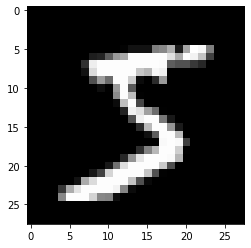

In [7]:
# Reestructuro datos de la imagen para visualizarla como imagen

# Toma la primera imagen del dataset de entrenamiento
first_image = x_train[0]

# Defino la imagen como un vector de pixeles
first_image = np.array(first_image, dtype='float')

# Digo la estructura de esos pixeles en el vector
pixels = first_image.reshape((28, 28))

# Pinto los pixeles
plt.imshow(pixels, cmap='gray')

# Muestra la imagen
plt.show()

In [116]:
# Compruebo el output de la imagen de prueba
y_train[0]

5

Primero normalizamos los datos que estaban de 0 a 255 y los ponemos entre 0 y 1

In [9]:
# Los pixeles pueden tener un valor entre 0 (negro) y 255 (blanco)
# Normalizar valores de datasets es un estandar para la posterior comparativa 

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


**Creamos el modelo de red neuronal usando el framework de keras**


La función Sequential() crea un modelo de red neuronal secuencial, donde las capas se apilan una encima de la otra en secuencia.

En este modelo, hay tres capas:

**Flatten()** es la capa de entrada y se utiliza para aplanar una imagen de 28x28 píxeles en una matriz de una dimensión de 784 píxeles. 

**Dense(128, activation='relu')** es una capa oculta con 128 neuronas y una función de activación ReLU. La función ReLU (Rectified 
Linear Unit) se utiliza comúnmente en capas ocultas para introducir no linealidad en la red y mejorar su capacidad de aprendizaje. 

**Dense(10, activation='softmax')** es la capa de salida con 10 neuronas y una función de activación softmax. La función softmax se utiliza en la capa de salida de una red neuronal para producir una distribución   de probabilidad sobre las clases de salida. 

In [10]:

# Crear el modelo de red neuronal
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

**Compilamos el modelo con el optimizador y la función de perdidas**

La función **compile()** se utiliza para especificar la configuración de entrenamiento, incluyendo el optimizador, la función de coste y las métricas de evaluación.

En este caso, se están utilizando los siguientes parámetros:

**optimizer='adam':** el algoritmo de optimización Adam se utilizará para ajustar los pesos de la red neuronal durante el entrenamiento. Adam es un optimizador popular y efectivo para el aprendizaje profundo que ajusta las tasas de aprendizaje de cada parámetro individualmente.

**loss='sparse_categorical_crossentropy':** la función de coste se utiliza para medir la diferencia entre las predicciones de la red neuronal y las etiquetas reales durante el entrenamiento. En este caso, se está utilizando la función de coste "sparse_categorical_crossentropy" que se utiliza para problemas de clasificación con varias clases.

**metrics=['accuracy']:** se especifica que la métrica de evaluación durante el entrenamiento será la precisión (accuracy) del modelo, es decir, el porcentaje de predicciones correctas que hace la red neuronal sobre el conjunto de datos de entrenamiento.

In [11]:

# Compilar el modelo con el optimizador y la función de coste
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Entrenamiento del modelo**

Este código entrena el modelo de red neuronal utilizando el conjunto de datos de entrenamiento x_train y y_train, y se realizarán 5 **epochs** (ciclos de backpropagation) de entrenamiento.

La función **fit()** es utilizada en Keras para entrenar el modelo. Los parámetros de entrada de la función son:


**x_train:** el conjunto de datos de entrenamiento que se utilizará para ajustar los pesos de la red neuronal. Este conjunto de datos debe estar en el formato adecuado para la entrada del modelo, que en este caso es una matriz 2D con dimensiones (número de muestras, tamaño de entrada).

**y_train:** las etiquetas correspondientes a cada muestra en el conjunto de datos de entrenamiento. Estas etiquetas deben estar en el formato adecuado para la salida del modelo, que en este caso es una matriz 1D con valores enteros que representan las clases de salida.

**epochs=5:** el número de epoch que se realizarán durante el entrenamiento. Una epoch es una pasada completa a través de todos los datos de entrenamiento. Por lo tanto, en este caso, el modelo se entrenará durante 5 iteraciones completas.

Durante el entrenamiento, el modelo ajustará los pesos para minimizar la función de coste especificada en la función compile(). Después de cada epoch, se calculará la precisión del modelo en el conjunto de datos de entrenamiento utilizando la métrica especificada en la función compile().

In [12]:

# Entrenar el modelo
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2591 - accuracy: 0.9265
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1158 - accuracy: 0.9662
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0799 - accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0602 - accuracy: 0.9815
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0468 - accuracy: 0.9856


**Evaluamos la precisión del modelo con la función evaluate y los datos de prueba**

La función **evaluate()** se utiliza para evaluar el modelo en un conjunto de datos de prueba después de que se haya entrenado. Los parámetros de entrada de la función son:

**x_test:** el conjunto de datos de prueba que se utilizará para evaluar el rendimiento del modelo. Este conjunto de datos debe estar en el formato adecuado para la entrada del modelo, que en este caso es una matriz 2D con dimensiones (número de muestras, tamaño de entrada).

**y_test:** las etiquetas correspondientes a cada muestra en el conjunto de datos de prueba. Estas etiquetas deben estar en el formato adecuado para la salida del modelo, que en este caso es una matriz 1D con valores enteros que representan las clases de salida.

**verbose=2:** un parámetro opcional que se utiliza para especificar el nivel de detalle de la información de evaluación que se muestra durante el proceso de evaluación. En este caso, se establece en 2 para mostrar el progreso y las métricas de evaluación al final del proceso.

La función **evaluate()** devuelve dos valores: test_loss y test_acc, que representan la pérdida y la precisión (accuracy) del modelo en el conjunto de datos de prueba, respectivamente.

In [13]:

# Evaluar la precisión del modelo en los datos de prueba
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nPrecisión en datos de prueba:', test_acc)

313/313 - 1s - loss: 0.0711 - accuracy: 0.9780 - 597ms/epoch - 2ms/step

Precisión en datos de prueba: 0.9779999852180481


**Aleatoriamente seleccionamos una imagen de las de prueba y la mostramos**

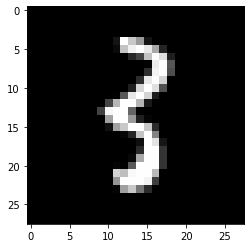

In [14]:

# Generar una nueva imagen aleatoria para probar el modelo

# Generamos un unero aleatorio entre el 0 y el 10000 que son los elementos de test
index = random.randint(0, 10000)

# seleccionamos ese elemento del dataset de test
new_image = x_test[index]

# Ploteamos el elemento
new_image = np.array(new_image, dtype='float')
pixels = new_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()


**Introducimos la imagen en el modelo y obtenemos el resultado**

La función **predict()** se utiliza para realizar una predicción de la salida de la red neuronal para un conjunto de datos de entrada. Los parámetros de entrada de la función son:

**np.array([new_image]):** la nueva imagen que se desea clasificar en formato de matriz numpy. En este caso, se proporciona una sola imagen como entrada, que debe estar en el formato adecuado para la entrada del modelo, que en este caso es una matriz 2D con dimensiones (1, tamaño de entrada).

La función **predict()** devuelve una matriz que representa las salidas de la red neuronal para las entradas proporcionadas en formato de matriz numpy.

En resumen, **model.predict(np.array([new_image]))** utiliza el modelo de red neuronal previamente entrenado para predecir la clase de una nueva imagen proporcionada como entrada en formato de matriz numpy. La salida es una matriz que representa la salida de la red neuronal para la nueva imagen.

In [15]:

prediction = model.predict(np.array([new_image]))
print('Predicción para la nueva imagen:', np.argmax(prediction))

1/1 [==============================] - 0s 249ms/step
Predicción para la nueva imagen: 3
